## Gerando conjunto de dados de planetas aleatórios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geexhp import DataGen, DataVis

In [2]:
dg = DataGen(url="http://127.0.0.1:3000/api.php")

Testing connection to PSG at http://127.0.0.1:3000/api.php ...
Connected to PSG with success.


In [3]:
dg.gerador(nplanetas=10_000,verbose=True,instrumento="HWC", arq="dados2")

Gerando planetas: 100%|██████████| 10000/10000 [tempo restante: 00:00, tempo gasto: 30:21:30]  


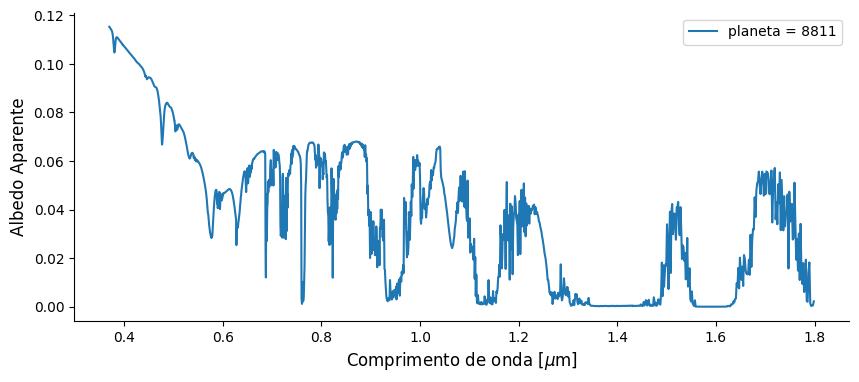

In [23]:
df_rnd = pd.read_parquet("../data/moderna10k.parquet")
indice = np.random.randint(0, len(df_rnd))

DataVis.plot_espectro(df_rnd, indice);